# Pixel Operations

1. Color space conversion: RGB and HSV
1. Negation in RGB and HSV
1. Color rotation
1. Bit planes of gray scale images

In [72]:
import numpy as np
import imageio
import skimage
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
def imshow(imlist): #
    """
    display a list of images
    """ 
    import numpy 
    if type(imlist) == numpy.ndarray or len(imlist) == 1:
        if type(imlist) == numpy.ndarray:
            plt.imshow(imlist); 
        else:
            plt.imshow(imlist[0]); 
        plt.axis(False);
    else:
        fig, axes = plt.subplots(1, len(imlist), figsize=(12,4))
        for ax, im in zip(axes, imlist):
            if len(im.shape) == 2:
                ax.imshow(im, cmap='gray')
            else:
                ax.imshow(im)
            ax.set_axis_off()
    #

# Color space conversion: RGB - HSV

- https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_tinting_grayscale_images.html#sphx-glr-auto-examples-color-exposure-plot-tinting-grayscale-images-py

- Bit resolution is important. UInt8 is the default bit format for an image. Do not assume it will be automatically Uint8. Make this specification explicit! 

(1, 9, 3)

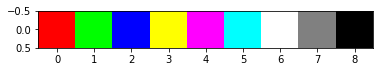

In [74]:
cim255 = np.array([[[255, 0, 0], [0, 255, 0], [0, 0, 255],
                    [255, 255, 0], [255, 0, 255], [0, 255, 255], 
                    [255, 255, 255], [128, 128, 128], [0, 0, 0]]], 
                dtype='uint8')

cnames = ['red', 'green', 'blue', 
          'yellow', 'magenta', 'cyan', 
          'white', 'gray', 'black']

plt.imshow(cim255)
cim255.shape 

In [75]:
# this is opencv version. default output is 255 uint8
cv2.cvtColor(cim255, cv2.COLOR_RGB2HSV)

array([[[  0, 255, 255],
        [ 60, 255, 255],
        [120, 255, 255],
        [ 30, 255, 255],
        [150, 255, 255],
        [ 90, 255, 255],
        [  0,   0, 255],
        [  0,   0, 128],
        [  0,   0,   0]]], dtype=uint8)

In [76]:
from skimage import color  # another package for HSV-RGB

In [77]:
# now come back to skimage
hsv = color.rgb2hsv(cim255)
hsv 

array([[[0.        , 1.        , 1.        ],
        [0.33333333, 1.        , 1.        ],
        [0.66666667, 1.        , 1.        ],
        [0.16666667, 1.        , 1.        ],
        [0.83333333, 1.        , 1.        ],
        [0.5       , 1.        , 1.        ],
        [0.        , 0.        , 1.        ],
        [0.        , 0.        , 0.50196078],
        [0.        , 0.        , 0.        ]]])

RGB ->  HSV
red        : [0. 1. 1.]
green      : [0.33 1.   1.  ]
blue       : [0.67 1.   1.  ]
yellow     : [0.17 1.   1.  ]
magenta    : [0.83 1.   1.  ]
cyan       : [0.5 1.  1. ]
white      : [0. 0. 1.]
gray       : [0.  0.  0.5]
black      : [0. 0. 0.]


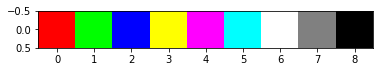

In [78]:
print('RGB ->  HSV')
for i in range(len(cnames)):
    print(f'{cnames[i]:10} : {np.round(hsv[0,i], 2)}')
plt.imshow(cim255);

In [79]:
# HSV -> RGB come back
rgb = color.hsv2rgb(hsv)
rgb, type(rgb), rgb.dtype 

(array([[[1.        , 0.        , 0.        ],
         [0.        , 1.        , 0.        ],
         [0.        , 0.        , 1.        ],
         [1.        , 1.        , 0.        ],
         [1.        , 0.        , 1.        ],
         [0.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.50196078, 0.50196078, 0.50196078],
         [0.        , 0.        , 0.        ]]]),
 numpy.ndarray,
 dtype('float64'))

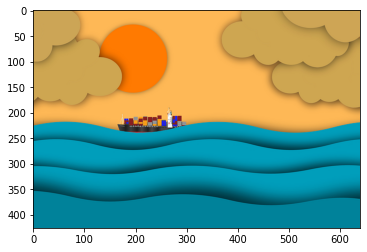

In [80]:
# Now let's use an image
imfile = 'pixels/image-15.png'
im = imageio.imread(imfile)  # RGB
plt.imshow(im);

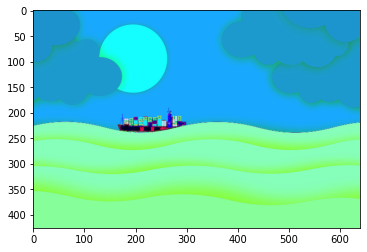

In [81]:
# RGB -> HSV
imhsv = color.rgb2hsv(im)
# display as if it was an RGB
plt.imshow(imhsv);

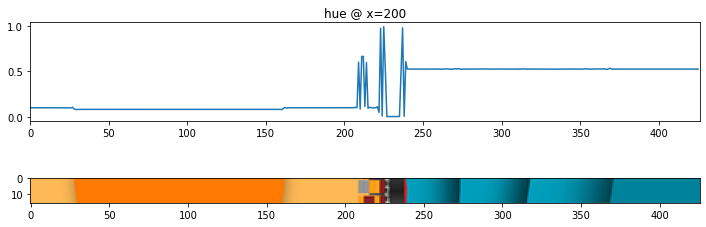

In [82]:
# Hue plot along x = 200
fig, axes = plt.subplots(2,1, figsize=(12,4))
axes[0].plot(imhsv[:,200, 0])
axes[0].set(xlim=[0, imhsv.shape[0]], title='hue @ x=200')
im200 = im[:,195:211,:]  # a little bit larger for better visual inspection
axes[1].imshow(im200.transpose(1,0,2));

- Red/yellow colors about 0.1 ~ 0.2 hue values
- Blue region has the same hue despite its variation in brightness

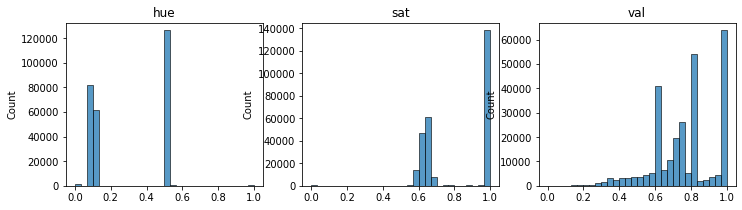

In [83]:
# histogram of HSV channels
fig, axes = plt.subplots(1,3, figsize=(12,3))
for i, chname in enumerate(['hue', 'sat', 'val']):
    sns.histplot(imhsv[:,:,i].reshape(-1), bins=30, ax=axes[i])
    axes[i].set(title=chname)

- The high population of saturation values near 1.0 indicates that there are many pixels of highest color purity.

## Tinting Gray-Scale Images

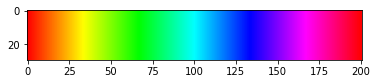

In [84]:
hue_gradient = np.linspace(0, 1, 201)
hsv = np.ones(shape=(30, len(hue_gradient), 3), dtype=float)
hsv[:, :, 0] = hue_gradient

all_hues = color.hsv2rgb(hsv)

plt.imshow(all_hues);

(512, 512) uint8


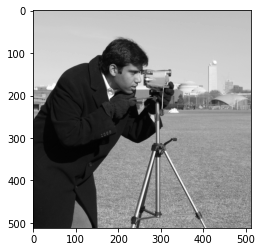

In [85]:
# Tinting Gray-scale Images
# https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_tinting_grayscale_images.html#sphx-glr-auto-examples-color-exposure-plot-tinting-grayscale-images-py

gray = skimage.data.camera()
print(gray.shape, gray.dtype)
plt.imshow(gray, cmap='gray');

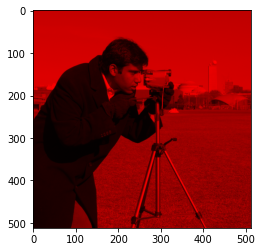

In [86]:
# we use the gray image as value component in HSV
gray1 = gray/255.
hsv = np.zeros((gray.shape[0], gray.shape[1], 3))
hsv[:,:,2] = gray1 
hsv[:,:,0] = 0  # red
hsv[:,:,1] = 1

rgb = color.hsv2rgb(hsv)
plt.imshow(rgb);

In [87]:
# we use the gray image as value component in HSV
def colorize(gray, hue, sat, return_hsv=False):
    # gray: gray scale image of shape (r, c) in uint8 
    # hue, sat : any value in [0, 1] for hue and saturation

    gray1 = gray/255.
    hsv = np.zeros((gray.shape[0], gray.shape[1], 3))
    hsv[:,:,2] = gray1 
    hsv[:,:,0] = hue 
    hsv[:,:,1] = sat

    rgb = color.hsv2rgb(hsv)  # 

    if not return_hsv:
        return rgb 
    else:
        return rgb, hsv 

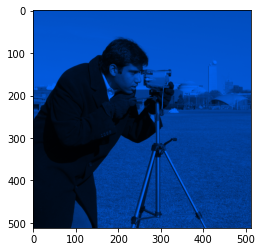

In [88]:
a = colorize(gray, hue=0.6, sat=0.99)
plt.imshow(a);

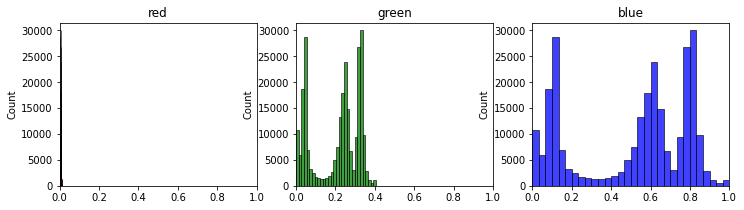

In [89]:
# histogram of RGB channels
fig, axes = plt.subplots(1,3, figsize=(12,3))
for i, chname in enumerate(['red', 'green', 'blue']):
    sns.histplot(a[:,:,i].reshape(-1), bins=30, ax=axes[i], color=chname)
    axes[i].set(title=chname, xlim=[0,1])

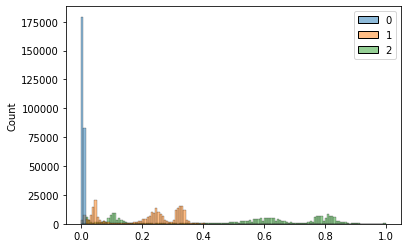

In [90]:
sns.histplot(a.reshape(-1,3));

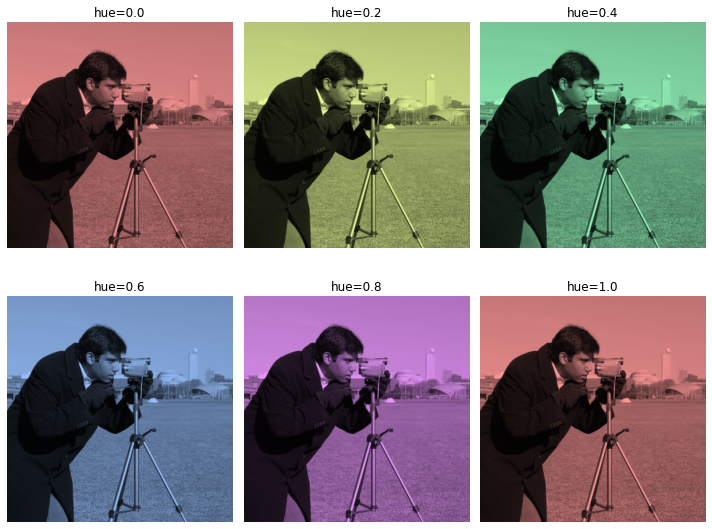

In [105]:
fig, axes = plt.subplots(2,3, sharex=True, sharey=True, figsize=(10,8))

hue_values = np.linspace(0, 1, 6)
for ax, hue in zip(axes.flat, hue_values):
    tinted = colorize(gray, hue, sat=0.4)
    ax.imshow(tinted)
    ax.set(title=f'hue={np.round(hue, 2)}')
    ax.set_axis_off()
fig.tight_layout()

In [92]:
# save to a png file

imageio.imwrite('tinted.png', tinted)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [93]:
tinted = colorize(gray, hue=.3, sat=0.3)

print('src data type: ', tinted.dtype, tinted.min(), tinted.max())
tinted = skimage.img_as_ubyte(tinted)
print('con data type: ', tinted.dtype, tinted.min(), tinted.max())
imageio.imwrite('tinted.png', tinted)

src data type:  float64 0.0 1.0
con data type:  uint8 0 255


In [94]:
tinted = colorize(gray, hue=.3, sat=0.3)
# we know the range of the pixel values is [0, 1]
print('src data type: ', tinted.dtype, tinted.min(), tinted.max())
tinted = (tinted * 255).astype(np.uint8)
print('con data type: ', tinted.dtype, tinted.min(), tinted.max())
imageio.imwrite('tinted.png', tinted)

src data type:  float64 0.0 1.0
con data type:  uint8 0 255


In [95]:
def plotims(ims):
    fig, axes = plt.subplots(1, len(ims), figsize=(12,4))
    for i in range(len(ims)):
        axes[i].imshow(ims[i])
    return

## Color rotation

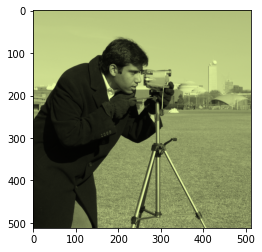

In [102]:
rgb, hsv = colorize(gray, hue=.2, sat=0.35, return_hsv=True)
plt.imshow(rgb);

hsv256: uint8, (512, 512, 3)  0  255


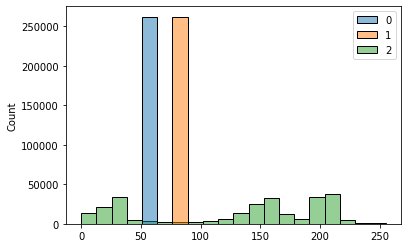

In [106]:
rgb, hsv = colorize(gray, hue=.2, sat=0.35, return_hsv=True)

hsv256 = skimage.img_as_ubyte(hsv) 

print(f'hsv256: {hsv256.dtype}, {hsv256.shape}  {hsv256.min()}  {hsv256.max()}')
sns.histplot(hsv256[:,:,:].reshape(-1, 3), bins=20);

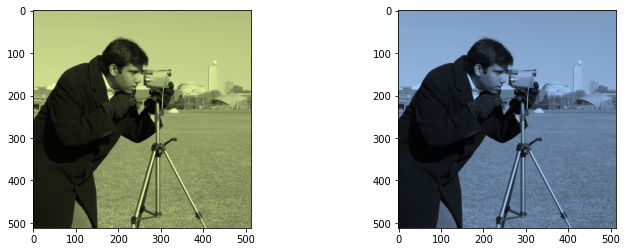

In [28]:
hsv256_2 = hsv256.copy() 
hsv256_2[:,:,0] = (hsv256_2[:,:,0] + 100) % 256  # circulate
plotims([rgb, 
        skimage.img_as_ubyte(color.hsv2rgb(hsv256_2))])

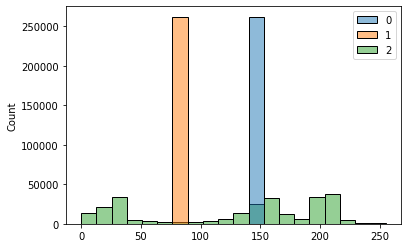

In [109]:
sns.histplot(hsv256_2[:,:,:].reshape(-1, 3), bins=20);

### Color rotation, movie

In [30]:
im = imageio.imread(imfile)  # read in an image file
hsv_src = skimage.img_as_ubyte(color.rgb2hsv(im))  # rgb -> hsv -> hsv256
shifted = hsv_src.copy()                           # destination
step = 1                                           # hue step
for i in range(2560):  # repeat many times
    # shifted[:,200:,0] = (hsv_src[:,200:,0] + i*step) % 256  # change Hue channel
    shifted[:,:,0] = (hsv_src[:,:,0] + i*step) % 256  # change Hue channel, cyclic
    shifted_rgb = color.hsv2rgb(shifted)              # hsv -> rgb, don't forget
    shifted_rgb = shifted_rgb[:,:,::-1]               # RGB -> BGR for cv2 interface
    shifted_rgb = skimage.img_as_ubyte(shifted_rgb)   # BGR 256 uint8 type
    cv2.putText(shifted_rgb,                          # draw a text, PIL also provides this function.
                f'{i*step:3}', 
                org=(20,im.shape[0]), 
                fontFace=cv2.FONT_HERSHEY_PLAIN, 
                fontScale=5, 
                color=(220,220,0), 
                thickness=4)
    cv2.imshow('win', shifted_rgb)       # display image in the window
    if cv2.waitKey(10) == 27: break      # if ESC pressed? then stop
#
cv2.destroyAllWindows()                  # kill the display window

---
## Chroma Key

1. Take a photo with a uniform background color
2. Measure the hue value of the background pixels
3. Replace any pixel having bg hue by the image for bg substitution.

See `chroma_keying.ipynb`

---
# Bitplanes

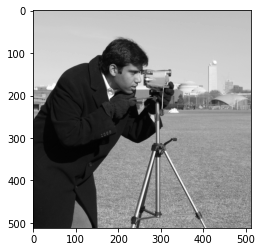

In [49]:
plt.imshow(gray, cmap='gray');

In [110]:
gray.shape, gray.dtype

((512, 512), dtype('uint8'))

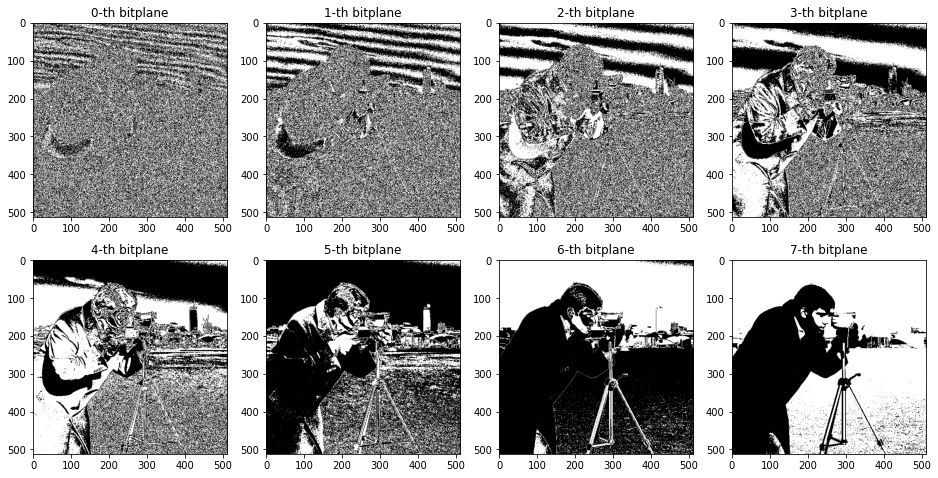

In [112]:
fig, axes = plt.subplots(2, 4, figsize=(16,8))
b = 1
for i, ax in zip(range(8), axes.flat):
    bitplane = np.bitwise_and(gray, 1<<i)
    # print(i, bitplane.max(), end=' ')
    bitplane = bitplane >> i # 0/1 image
    # print(' -->  ', bitplane.max())
    ax.imshow(bitplane, cmap='gray')
    ax.set(title=f'{i}-th bitplane')

---
# Gamma Correction
Pixel value change by a mapping transformation; especially for the purpose of monitor display.

In [57]:
import numpy as np
import imageio
import skimage
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

(512, 512) uint8


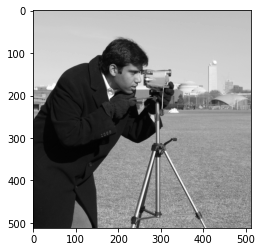

In [58]:
# Tinting Gray-scale Images
# https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_tinting_grayscale_images.html#sphx-glr-auto-examples-color-exposure-plot-tinting-grayscale-images-py

gray = skimage.data.camera()
print(gray.shape, gray.dtype)
plt.imshow(gray, cmap='gray');

In [59]:
def mapping(input_value, exponent=1.):
    """
    input: pixel value in [0, 1], float
    output: pixel value in [0, 1]
    """
    output_value = np.power(input_value, exponent)
    return output_value

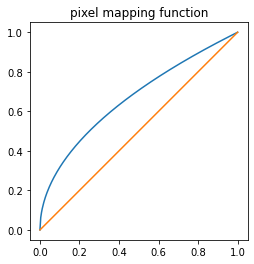

In [60]:
a = np.linspace(0,1,256)
plt.plot(a, mapping(a, 0.5));
plt.plot(a, a);
plt.gca().set_aspect('equal');
plt.title('pixel mapping function');

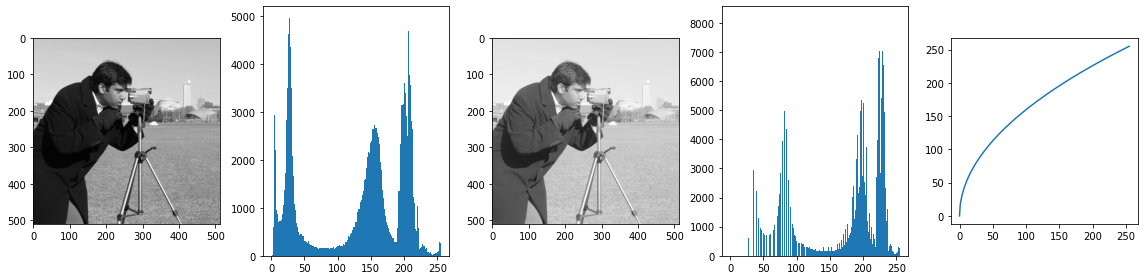

In [61]:
gray2 = mapping(gray / 255., 0.5)

gray2 = (gray2 * 255).astype('uint8')   # convert back to [0, 255] uint8

fig, axes = plt.subplots(1, 5, figsize=(16,4))
axes[0].imshow(gray, cmap='gray');
axes[1].hist(gray.reshape(-1), bins=256);
axes[2].imshow(gray2, cmap='gray');
axes[3].hist(gray2.reshape(-1), bins=256);
axes[4].plot(a*255, 255*mapping(a, .5));
axes[4].set_aspect('equal')
plt.tight_layout()

## General mapping functions

In [39]:
def inverse(im): # or negate
    """
    im: an image: RGB/BGR/HSV/Gray
    inverse: pixel_value = 1 - pixel_value
    """
    out = 255 - im 
    return out 

255


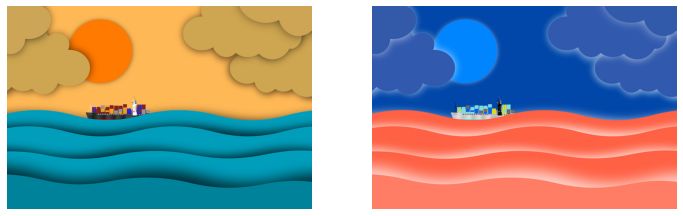

In [40]:
im = imageio.imread("pixels/image-15.png")
print(im.reshape(-1,3).max())
im_inverse = inverse(im)
imshow([im, im_inverse]);

252


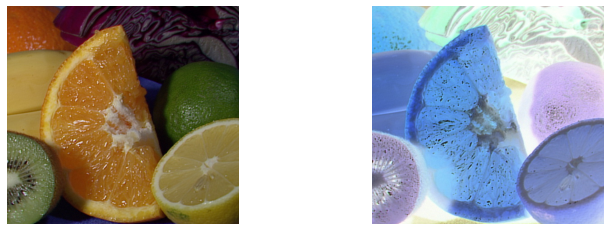

In [66]:
im2 = imageio.imread("data/fruits.jpg")  # this is RGB
print(im2.reshape(-1,3).max())
im_inverse2 = inverse(im2)
imshow([im2, im_inverse2]);
plt.imshow(im_inverse2);

(1920, 1920, 3)


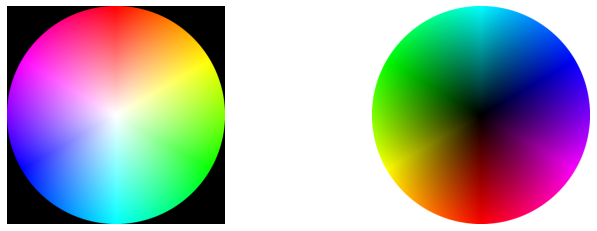

In [67]:
im = cv2.imread("pixels/1920px-Color_circle_(RGB).png")[:,:,::-1]  # RGB
print(im.shape)
im_inverse = inverse(im)
imshow([im, im_inverse]);

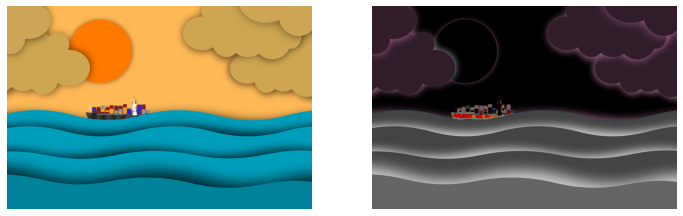

In [119]:
im = cv2.imread("pixels/image-15.png")[:,:,::-1]  # RGB

im_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)

im_hsv_inverse = np.zeros_like(im_hsv)
im_hsv_inverse[:,:,0] = 180 - im_hsv[:,:,0] #inverse(im) # 1 - v
im_hsv_inverse[:,:,1:] = 255 - im_hsv[:,:,1:]

im_inverse = cv2.cvtColor(im_hsv_inverse, cv2.COLOR_HSV2RGB)

imshow([im, im_inverse]);

255


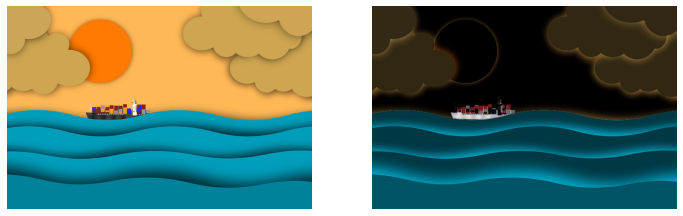

In [ ]:
# we may inverse the Value channel only
# (hue, sat) are kept the same
im = cv2.imread("pixels/image-15.png")[:,:,::-1]  # RGB
im_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
# ---
im_hsv_inverse = im_hsv.copy()
print(im_hsv[:,:,2].max())
im_hsv_inverse[:,:,2] = 255 - im_hsv_inverse[:,:,2]
# ---
im_inverse = cv2.cvtColor(im_hsv_inverse, cv2.COLOR_HSV2RGB)
imshow([im, im_inverse]);

### Hue negate & rotate

179


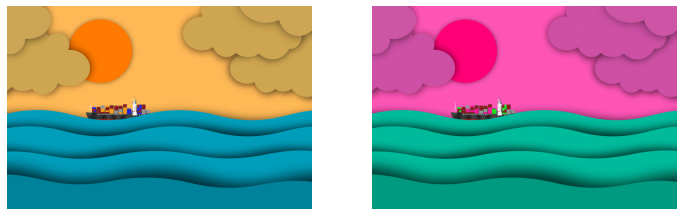

In [120]:
# we may negate the hue channel only
# (sat, value) are kept the same
im = cv2.imread("pixels/image-15.png")[:,:,::-1]  # RGB
im_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
# ---
im_hsv_inverse = im_hsv.copy()
print(im_hsv[:,:,0].max())
im_hsv_inverse[:,:,0] = 180 - im_hsv_inverse[:,:,0]
# ---
im_inverse = cv2.cvtColor(im_hsv_inverse, cv2.COLOR_HSV2RGB)
imshow([im, im_inverse]);

179


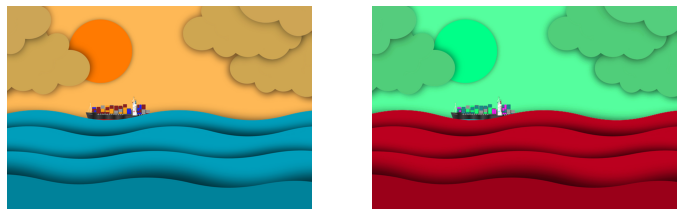

In [121]:
# we may negate the hue channel only
# (sat, value) are kept the same
im = cv2.imread("pixels/image-15.png")[:,:,::-1]  # RGB
im_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
# ---
im_hsv_inverse = im_hsv.copy()
print(im_hsv[:,:,0].max())
im_hsv_inverse[:,:,0] = (270 - im_hsv_inverse[:,:,0]) % 180
# ---
im_inverse = cv2.cvtColor(im_hsv_inverse, cv2.COLOR_HSV2RGB)
imshow([im, im_inverse]);

179


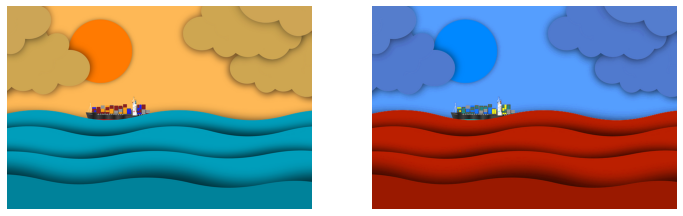

In [122]:
# we may negate the hue channel only
# (sat, value) are kept the same
im = cv2.imread("pixels/image-15.png")[:,:,::-1]  # RGB
im_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
# ---
im_hsv_inverse = im_hsv.copy()
print(im_hsv[:,:,0].max())
im_hsv_inverse[:,:,0] = (90 + im_hsv_inverse[:,:,0]) % 180
# ---
im_inverse = cv2.cvtColor(im_hsv_inverse, cv2.COLOR_HSV2RGB)
imshow([im, im_inverse]);

---
# Brightness Control
- Increase the intensity of the image

(683, 1024, 3)
Intensity Min/Max:  114 208


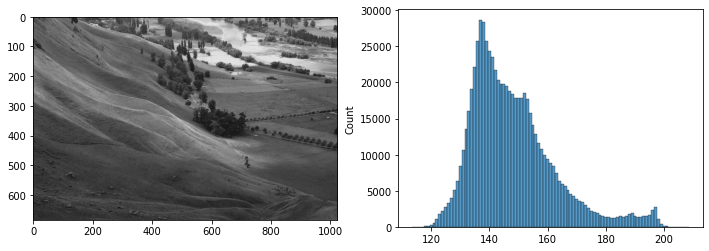

In [124]:
im = cv2.imread("pixels/Unequalized_Hawkes_Bay_NZ.jpg")  # read as single channel 
print(im.shape)

im = im[:,:,0]  # 3 channle but gray scale

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].imshow(im, cmap="gray")
sns.histplot(im.reshape(-1), discrete=True, bins=256)

print("Intensity Min/Max: ", im.min(), im.max())

True

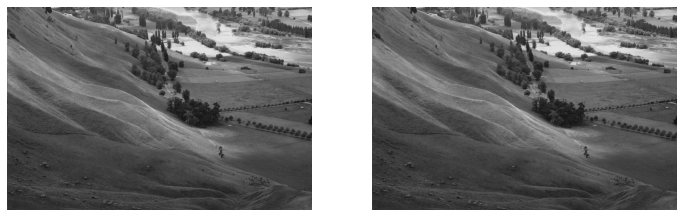

In [134]:
def brightness(im, brightness_adjust = 100):
    im_out = np.empty_like(im)
    for r in range(im.shape[0]):
        for c in range(im.shape[1]):
            
            result = im[r, c] + brightness_adjust

            if result > 255:
                result = 255
            elif result < 0:
                result = 0 

            im_out[r, c] = result 
    return im_out
#

adjust = 30
im_out = brightness(im, adjust)
imshow([im, im_out])
cv2.imwrite(f"outputs/brightness+{adjust}.png", im_out)

<AxesSubplot:ylabel='Count'>

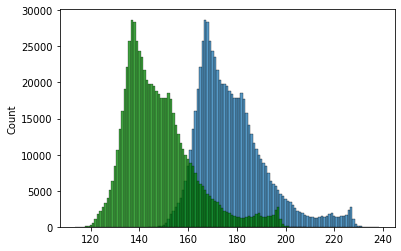

In [126]:
sns.histplot(im_out.reshape(-1), bins=256, discrete=True)
sns.histplot(im.reshape(-1), bins=256, discrete=True, color="green")

You must watch outside jupter notebook!


True

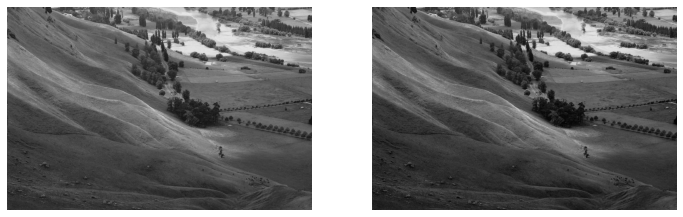

In [135]:
im_out = brightness(im, -120)
imshow([im, im_out])
print("You must watch outside jupter notebook!")
cv2.imwrite("outputs/brightness-120.png", im_out)

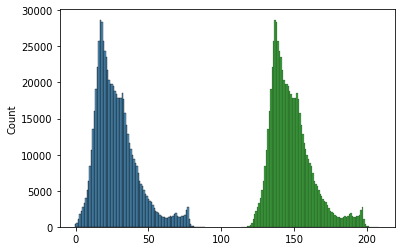

In [128]:
sns.histplot(im_out.reshape(-1), bins=256, discrete=True);
sns.histplot(im.reshape(-1), bins=256, discrete=True, color="green");

### Linear interpolation for full range expansion
- Linear Stretch
$$
    \frac{x-a}{b-a} = \frac{y-c}{d-c}
$$
$$
   y = \frac{(x-a) * (d-c) }{ (b-a) } + c , \quad d = 255, c= 0, a = I_{min}, b = I_{max}
$$

In [130]:
def brightness_expand(im, imin, imax):
    a, b = imin, imax
    def func(x):
        y = (x - a)*(255. - 0) / (imax-imin) + 0.
        return y 

    im_out = np.empty_like(im)
    for r in range(im.shape[0]):
        for c in range(im.shape[1]):
            
            result = func(im[r, c])

            if result > 255:
                result = 255
            elif result < 0:
                result = 0 

            im_out[r, c] = result 
    return im_out
#

uint8


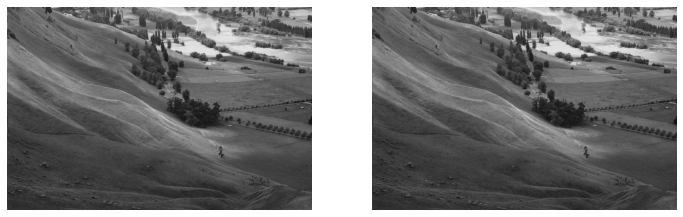

In [132]:
im_out = brightness_expand(im, im.min(), im.max())
print(im_out.dtype)
cv2.imwrite("outputs/brightness_expand.png", im_out)
imshow([im, im_out])

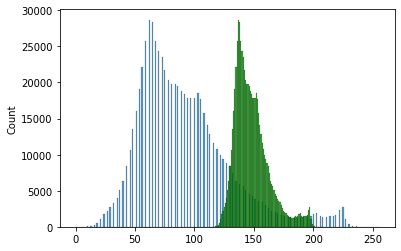

In [ ]:
sns.histplot(im_out.reshape(-1), discrete=True, bins=255);
sns.histplot(im.reshape(-1), discrete=True, color='green', bins=255);

In [ ]:
im.min(), im.max()

(114, 208)

True

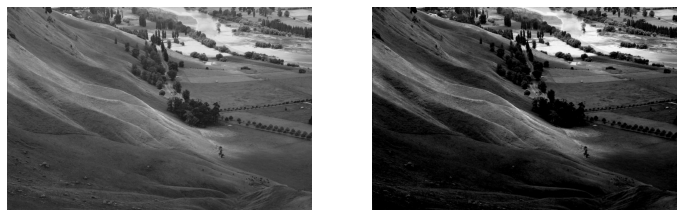

In [136]:
im_out2 = brightness_expand(im, 134, 200)
imshow([im, im_out2])
cv2.imwrite("outputs/brightness_expand_134_200.png", im_out2)

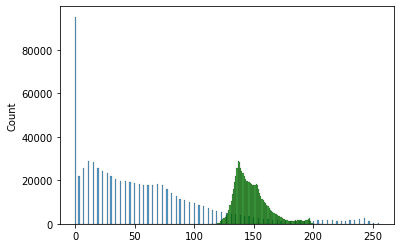

In [ ]:
sns.histplot(im_out2.reshape(-1), discrete=True, bins=255);
sns.histplot(im.reshape(-1), discrete=True, color='green', bins=255);

In [ ]:
# It can be done with numpy
def brightness_expand_np(im, imin, imax):
    im_out = (im - imin) * (255. - 0) / (imax - imin)
    print(im_out.dtype)
    im_out = np.clip(im_out, 0, 255).astype("uint8")
    return im_out
#

float64


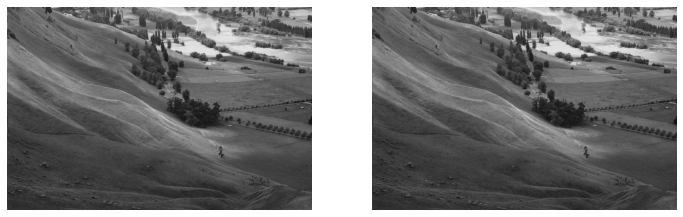

In [ ]:
im_out3 = brightness_expand_np(im, im.min(), im.max())
imshow([im, im_out3])

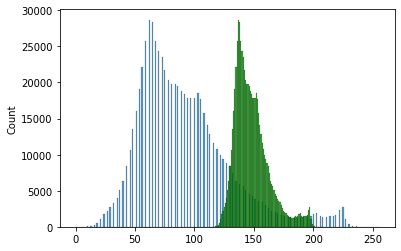

In [ ]:
sns.histplot(im_out3.reshape(-1), discrete=True, bins=255);
sns.histplot(im.reshape(-1), discrete=True, color='green', bins=255);

float64


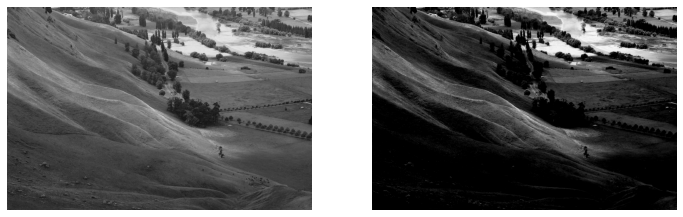

In [ ]:
# It can be done with numpy
im_out4 = brightness_expand_np(im, 140., 200.)
imshow([im, im_out4])

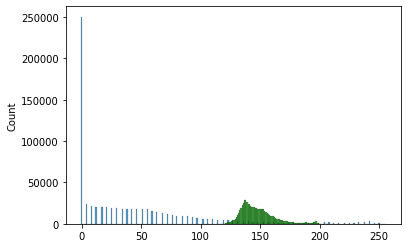

In [ ]:
sns.histplot(im_out4.reshape(-1), discrete=True, bins=255);
sns.histplot(im.reshape(-1), discrete=True, color='green', bins=255);

**Linearly Stretching** was the main algorithm above.

---
# Histogram Equalization (Contrast control)
- See [wikipedia for Histogram Equalization](https://en.wikipedia.org/wiki/Histogram_equalization)
    - Histogram equalization is a method in image processing of contrast adjustment using the image's histogram.
    - This method usually increases the global contrast of many images, especially when the image is represented by a narrow range of intensity values. 
    - Through this adjustment, the intensities can be better distributed on the histogram utilizing the full range of intensities evenly. This allows for areas of lower local contrast to gain a higher contrast. 
    - Histogram equalization accomplishes this by effectively spreading out the highly populated intensity values which use to degrade image contrast.
    - The method is useful in images with backgrounds and foregrounds that are both bright or both dark.
    - Change the pixel values in such a way that the histogram of the pixel values become a uniform distribution.

![image](pixels/hist_eq_example.png)

### OpenCV has the function.

(683, 1024, 3)


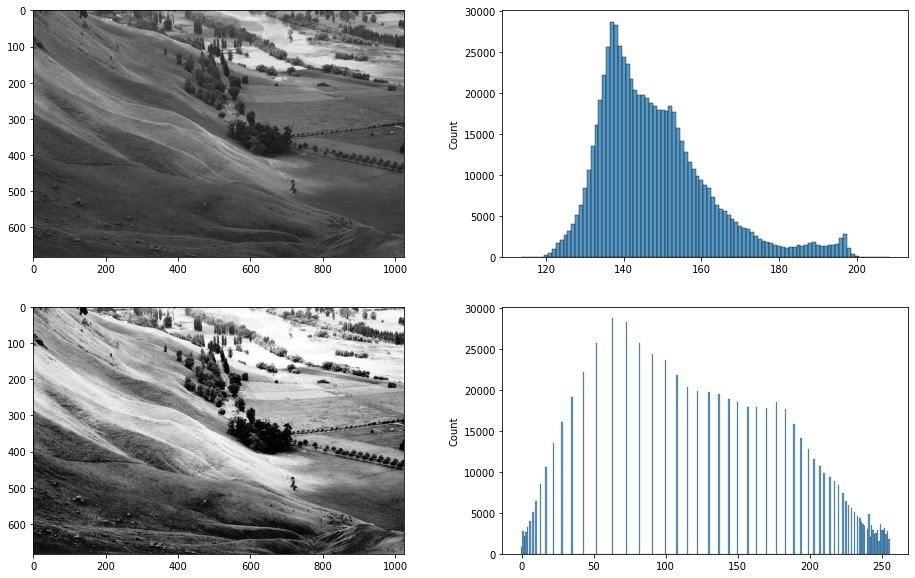

In [ ]:
im = cv2.imread("pixels/Unequalized_Hawkes_Bay_NZ.jpg")  # read as single channel 
print(im.shape)
im = im[:,:,0]  # 3 channle but gray scale

im_eq = cv2.equalizeHist(im)

fig, axes = plt.subplots(2,2, figsize=(16,10))
axes[0,0].imshow(im, cmap='gray');       
sns.histplot(im.reshape(-1), discrete=True, ax=axes[0,1])
axes[1,0].imshow(im_eq, cmap='gray')
sns.histplot(im_eq.reshape(-1), discrete=True, ax=axes[1,1]);
# for ax in axes.ravel():
#     ax.set_axis_off()

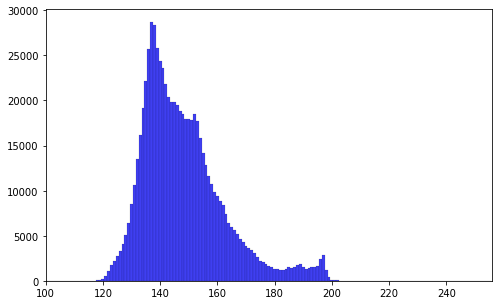

In [ ]:
# Histogram DIY
histogram_array = np.zeros((256), dtype="int")

for r in range(im.shape[0]):
    for c in range(im.shape[1]):
        intensity = im[r, c]
        histogram_array[intensity] += 1  # count the number of pixels whose intensity is ...
#

plt.figure(figsize=(8, 5))
plt.bar(range(256), histogram_array, width=1, facecolor='#3f3ff1', linewidth=.1, edgecolor='black')
plt.xlim([100, 256]);

- Histogram corresponds to the distribution of pixel intensities.
- CDF of the normalized histogram plays the role of mapping: input distribution -> uniform distribution
    - CDF: Cumulative Distribution Function

(256,) (257,) (256,) float64 (256,)


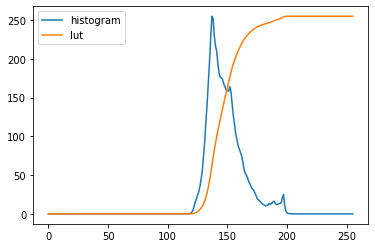

In [ ]:
hist_im, hist_im_bins = np.histogram(im.reshape(-1), bins=256, range=(0,256))
cdf = hist_im.cumsum()
lut = cdf * 255. / cdf[-1]
print(hist_im.shape, hist_im_bins.shape, cdf.shape , lut.dtype, lut.shape)

hist_im255 = hist_im * 255 / hist_im.max()  # scaling

plt.plot(range(0, 256), hist_im255, label='histogram')
plt.plot(range(0, 256), lut, label='lut')
plt.legend();

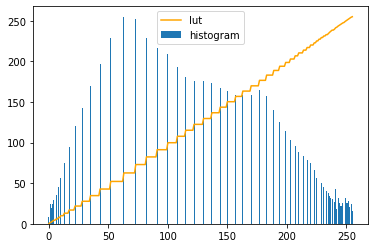

In [ ]:
hist_im_eq, hist_im_eq_bins = np.histogram(im_eq.reshape(-1), bins=256, range=(0,256))
cdf_eq = hist_im_eq.cumsum()
lut_eq = cdf_eq * 255. / cdf_eq[-1]

hist_im_eq255 = hist_im_eq * 255 / hist_im_eq.max()  # scaling

plt.bar(range(0, 256), hist_im_eq255, label='histogram')
plt.plot(range(0, 256), lut_eq, label='lut', color='orange')
plt.legend();

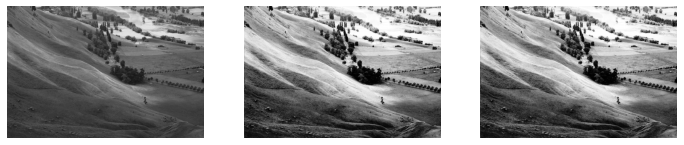

In [ ]:
# LUT gives the transformatioin function
# we may apply it directly instead of utilizing cv2.hist_equalize()

im_lut = np.zeros_like(im)
for r in range(im.shape[0]):
    for c in range(im.shape[1]):
        intensity = im[r,c]

        mapped = np.clip(lut[intensity] + 0.5, 0, 255).astype("uint8")

        im_lut[r,c] = mapped
#
imshow([im, im_lut, im_eq])

(256,) int64
Abs(diff) =  0


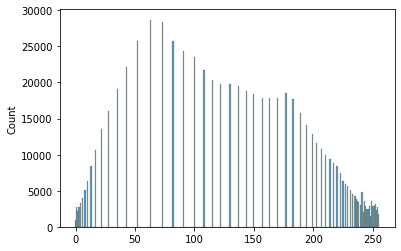

In [ ]:
# let's compare the histogram of lut-transformed image and the one from cv2.hist_equalize()
# the two should be almost the same.
#
hist_lut, _ = np.histogram(im_lut.reshape(-1), bins=256, range=(0,256))
print(hist_lut.shape, hist_lut.dtype)

sns.histplot(im_eq.reshape(-1), discrete=True)
plt.bar(np.arange(0, 256), hist_lut, color='orange', alpha=.2);

diff = hist_lut - hist_im_eq
print('Abs(diff) = ', sum(np.abs(diff)))

---
End.

# Background Subtraction
- https://docs.opencv.org/4.x/d1/dc5/tutorial_background_subtraction.html 


![image](pixels/Background_Subtraction_Tutorial_Scheme.png)

- Background subtraction (BS) is a common and widely used technique for generating a foreground mask (namely, a binary image containing the pixels belonging to moving objects in the scene) by using static cameras.
- As the name suggests, BS calculates the foreground mask performing a subtraction between the current frame and a background model, containing the static part of the scene or, more in general, everything that can be considered as background given the characteristics of the observed scene.

- Background modeling consists of two main steps:

    1. Background Initialization;
        - In the first step, an initial model of the background is computed
    2. Background Update
        - while in the second step that model is updated in order to adapt to possible changes in the scene.

In this tutorial we will learn how to perform BS by using OpenCV.

In [ ]:
from __future__ import print_function
import cv2 as cv
import argparse
parser = argparse.ArgumentParser(description='This program shows how to use background subtraction methods provided by \
                                              OpenCV. You can process both videos and images.')
parser.add_argument('--input', type=str, help='Path to a video or a sequence of image.', default='vtest.avi')
parser.add_argument('--algo', type=str, help='Background subtraction method (KNN, MOG2).', default='MOG2')
args = parser.parse_args()
if args.algo == 'MOG2':
    backSub = cv.createBackgroundSubtractorMOG2()
else:
    backSub = cv.createBackgroundSubtractorKNN()
capture = cv.VideoCapture(cv.samples.findFileOrKeep(args.input))
if not capture.isOpened():
    print('Unable to open: ' + args.input)
    exit(0)
while True:
    ret, frame = capture.read()
    if frame is None:
        break
    
    fgMask = backSub.apply(frame)
    
    cv.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
    cv.putText(frame, str(capture.get(cv.CAP_PROP_POS_FRAMES)), (15, 15),
               cv.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    
    
    cv.imshow('Frame', frame)
    cv.imshow('FG Mask', fgMask)
    
    keyboard = cv.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break

Results of Background Construction & Subtraction:

![image](pixels/Background_Subtraction_Tutorial_frame.jpg)
![image](pixels/Background_Subtraction_Tutorial_result_KNN.jpg)

---
### RGB Color quantization
- can reduce the number of colors -> compression

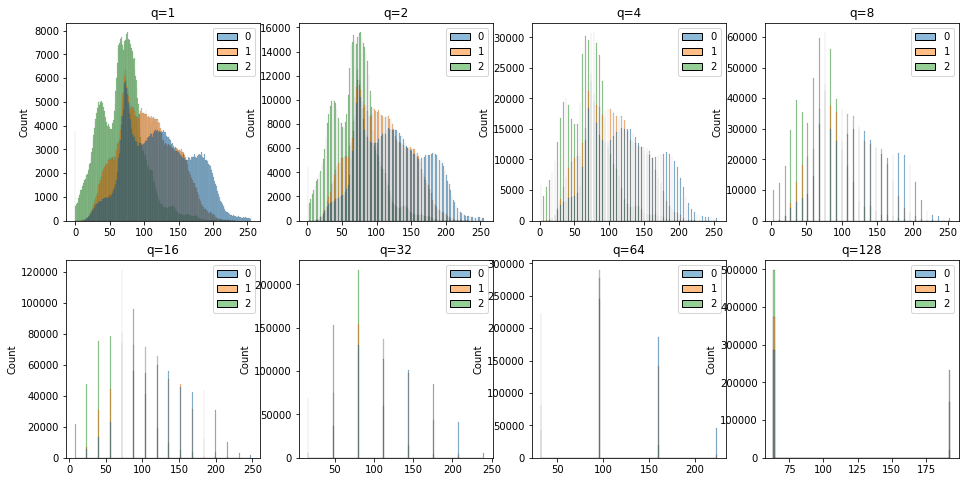

In [ ]:
# cartoonize by color quantization
# simply decrease the number of colors by quantization
qlist = [1, 2, 4, 8, 16, 32, 64, 128]
fig, axes = plt.subplots(2,4, figsize=(16,8))
for q, ax in zip(qlist, axes.ravel()):
    # q = 16
    im_q = (im // q) * q + q//2
    
    imageio.imwrite(f"outputs/color_quantize_{q}.png", im_q)
    sns.histplot(im_q.reshape(-1,3), bins=256,discrete=True, ax=ax); 
    ax.set(title=f"q={q}");

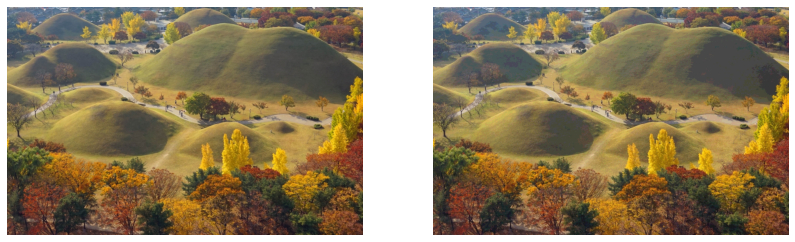

In [ ]:
# cartoonize by color quantization
# simply decrease the number of colors by quantization

q = 16
im_q = (im // q) * q + q//2
imshow([im, im_q])

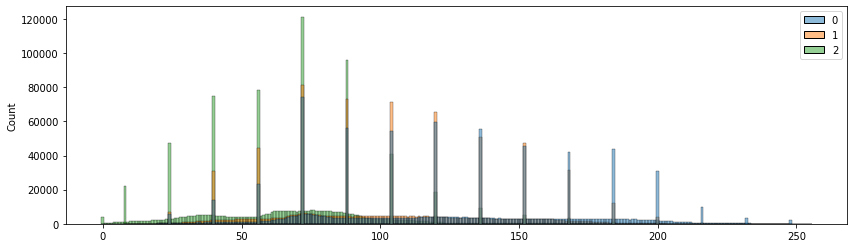

In [ ]:
sns.histplot(im.reshape(-1,3), discrete=True)
sns.histplot(im_q.reshape(-1,3), discrete=True);

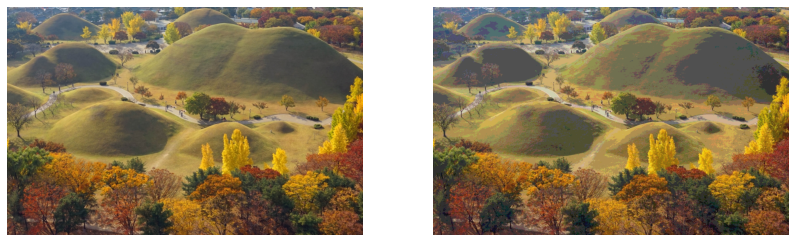

In [ ]:
# cartoonize by color quantization
# simply decrease the number of colors by quantization

q = 32
im_q = (im // q) * q + q//2
imshow([im, im_q])

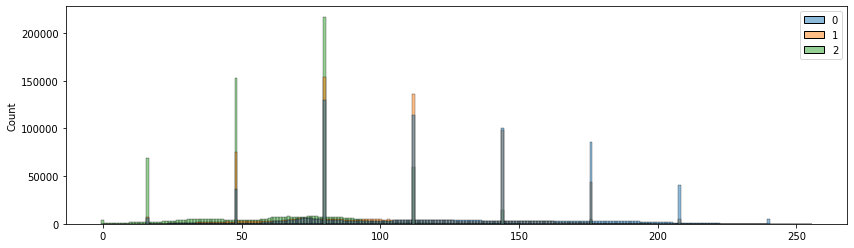

In [ ]:
sns.histplot(im.reshape(-1,3), discrete=True)
sns.histplot(im_q.reshape(-1,3), discrete=True);

Color quantization can be done in HSV.

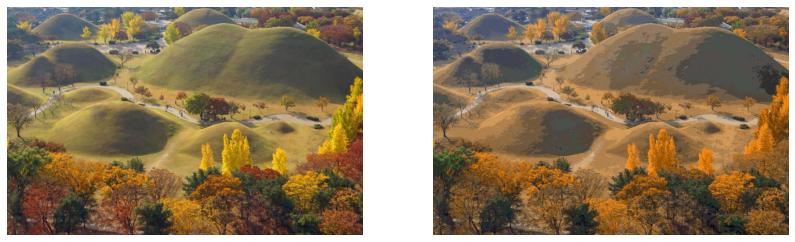

In [ ]:
hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
q = 32
hsv = (hsv // q) * q + q // 2
im_q = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
imshow([im, im_q])

### Color quantization with k-means clustering
- https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html 
- https://en.wikipedia.org/wiki/K-means_clustering 
- https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html 

![image](pixels/K-means_convergence.gif)

In [ ]:
256 // 32

8

In [ ]:
from sklearn.cluster import KMeans
n_colors = 8

im3d = im.reshape(-1,3) # image taken as a bunch of data in 3D

(10000,) (10000,) (10000, 3)


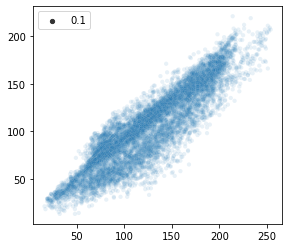

In [ ]:
n = 10000
idx = np.random.permutation(im3d.shape[0])[:n]
colors = im3d[idx]
R,G,B = im3d[idx].T
print(R.shape, G.shape, colors.shape)
ax = sns.scatterplot(x=R, y=G, alpha=.1, size=.1);
ax.set_aspect(1.)

In [ ]:
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(im3d)

In [ ]:
labels = kmeans.predict(im3d)
labels.shape

(519300,)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


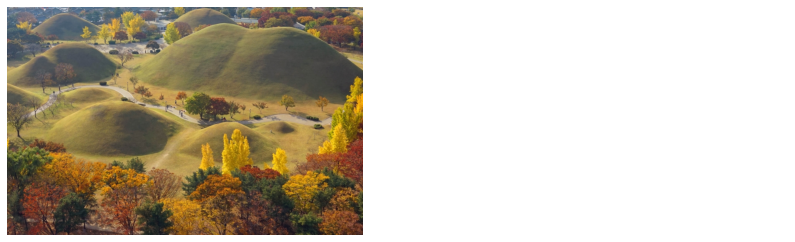

In [ ]:
im64 = kmeans.cluster_centers_[labels].reshape(im.shape)
imshow([im, im64])

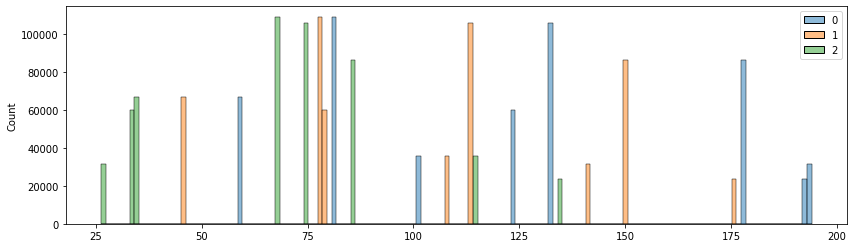

In [ ]:
sns.histplot(im64.reshape(-1,3));

<AxesSubplot:>

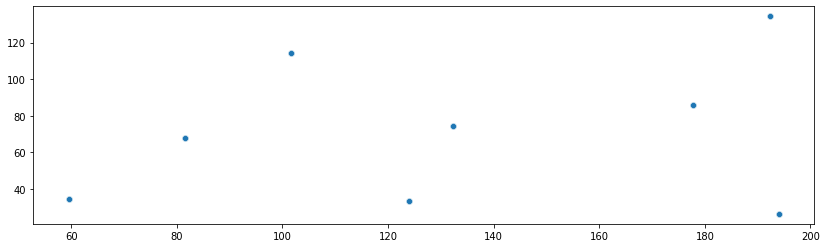

In [ ]:
im64_3d=im64.reshape(-1,3)
sns.scatterplot(x=im64_3d[:,0], y=im64_3d[:,2])

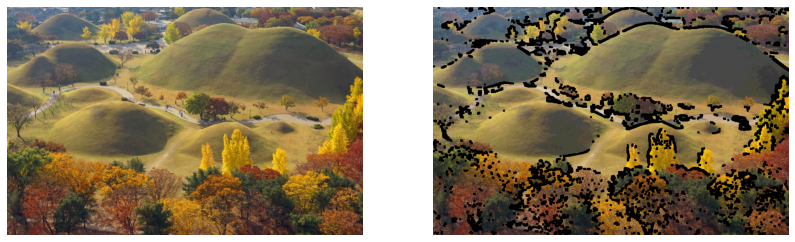

In [ ]:
# edge enhancing together with color quantization
q = 16
im_q = (im // q) * q + q//2

im_qe = sobel_enhance(im_q)
imshow([im, im_qe])

End.